In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
f_combined = pd.read_csv('f_combined.csv')
f_combined.head()

,tf_idf_c,Head_Body_Sim,Head_compound,Head_neg,Head_neu,Head_pos,Body_compound,Body_neg,Body_neu,Body_pos,...,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,i_me_myself,punct,target,dataset
0,0.118339,0.804282,-0.8238,0.580,0.304,0.116,-0.119276,0.117241,0.806000,0.076724,...,13.34,11.6,7.75,107.0,8.285714,16.79,3.0,51.0,REAL,Dataset - 1
1,0.006971,0.971542,-0.4215,0.201,0.714,0.084,0.447000,0.047333,0.826000,0.126667,...,12.32,24.7,8.67,48.0,21.000000,27.29,0.0,20.0,FAKE,Dataset - 1
2,0.073704,0.968892,0.0000,0.000,1.000,0.000,0.045808,0.044583,0.685500,0.269833,...,11.50,16.9,8.41,57.0,16.250000,22.56,0.0,28.0,FAKE,Dataset - 1
3,0.260532,0.914280,0.0000,0.000,1.000,0.000,-0.030662,0.097875,0.748500,0.153750,...,13.87,15.2,8.62,45.0,15.750000,20.97,0.0,17.0,FAKE,Dataset - 1
4,0.294392,0.930432,-0.5994,0.438,0.562,0.000,-0.159617,0.121278,0.807167,0.071556,...,13.28,11.7,9.09,81.0,8.571429,20.26,1.0,34.0,FAKE,Dataset - 1


In [3]:
save_plot = 'visualization/temp/'

In [4]:
readings = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
        'coleman_liau_index', 'automated_readability_index', 
        'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula',
        'gunning_fog', 'i_me_myself', 'punct']
sentiments = ['Head_compound', 'Head_neg', 'Head_neu',
              'Head_pos', 'Body_compound', 'Body_neg', 'Body_neu', 'Body_pos']

In [5]:
len(readings)

11

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

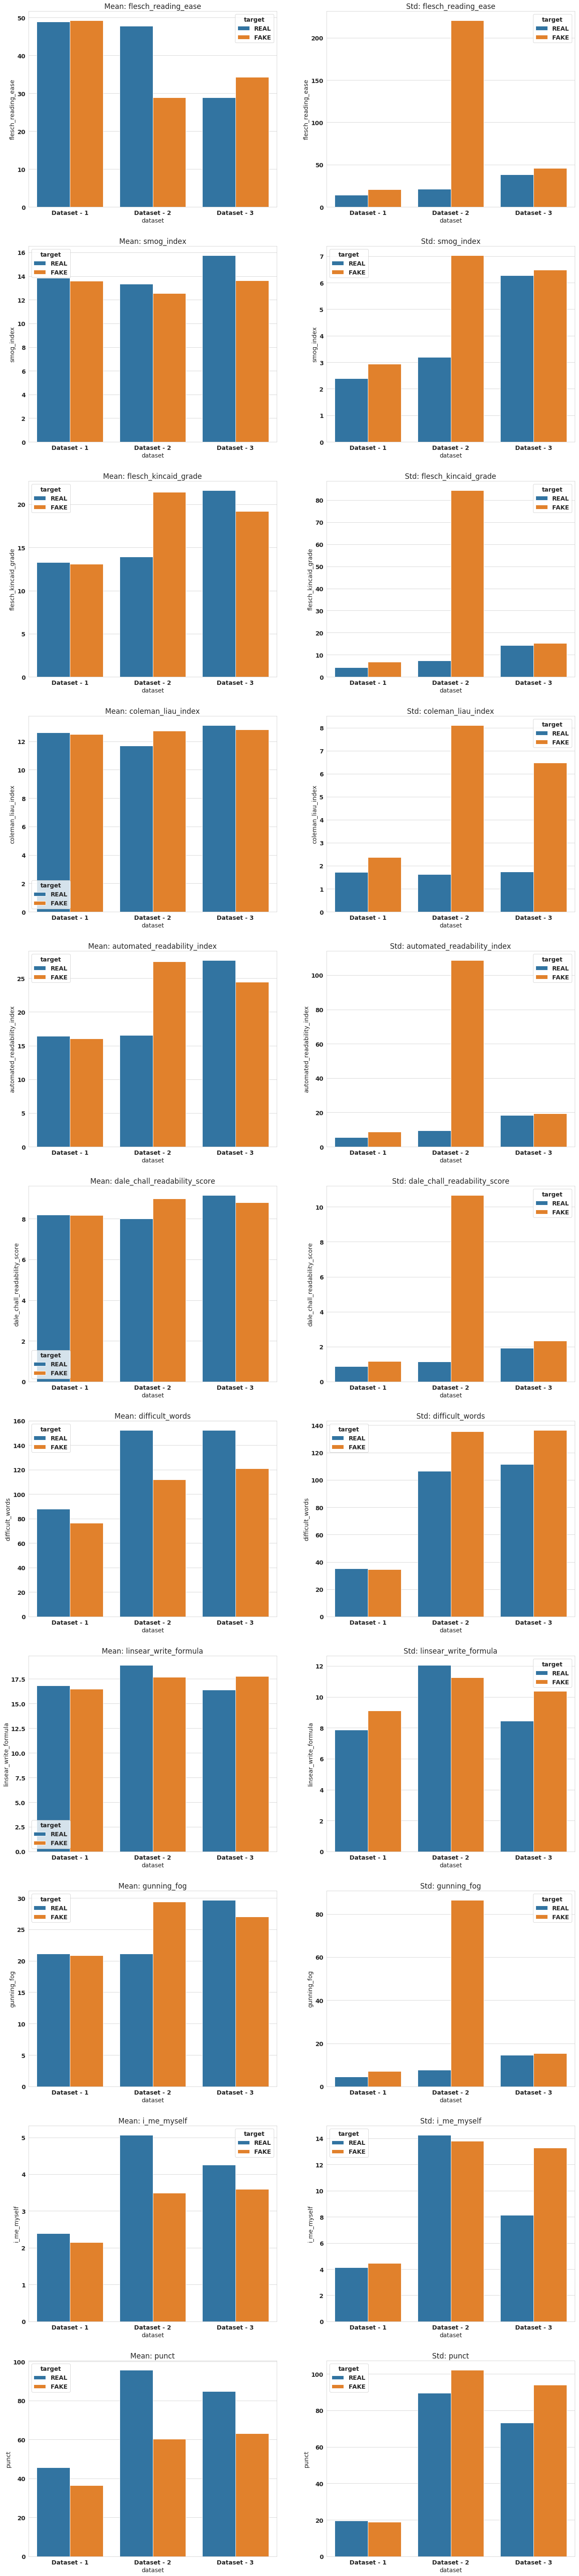

In [18]:
fig, axs = plt.subplots(nrows = len(readings), ncols = 2,figsize = (23,10*len(readings)))
for i,j in enumerate(readings):
    mean = sns.barplot(x = 'dataset', y = j, hue = 'target', data=f_combined, ax=axs[i][0],
               estimator = np.mean, ci=False)
    axs[i][0].title.set_text('Mean: '+j)
    
    std = sns.barplot(x = 'dataset', y = j, hue = 'target', data=f_combined, ax=axs[i][1], 
                estimator= np.std, ci = False)
    axs[i][1].title.set_text('Std: '+j)
    



In [19]:
#fig.savefig(save_plot+'Categorical_reading_features', dpi = 300)

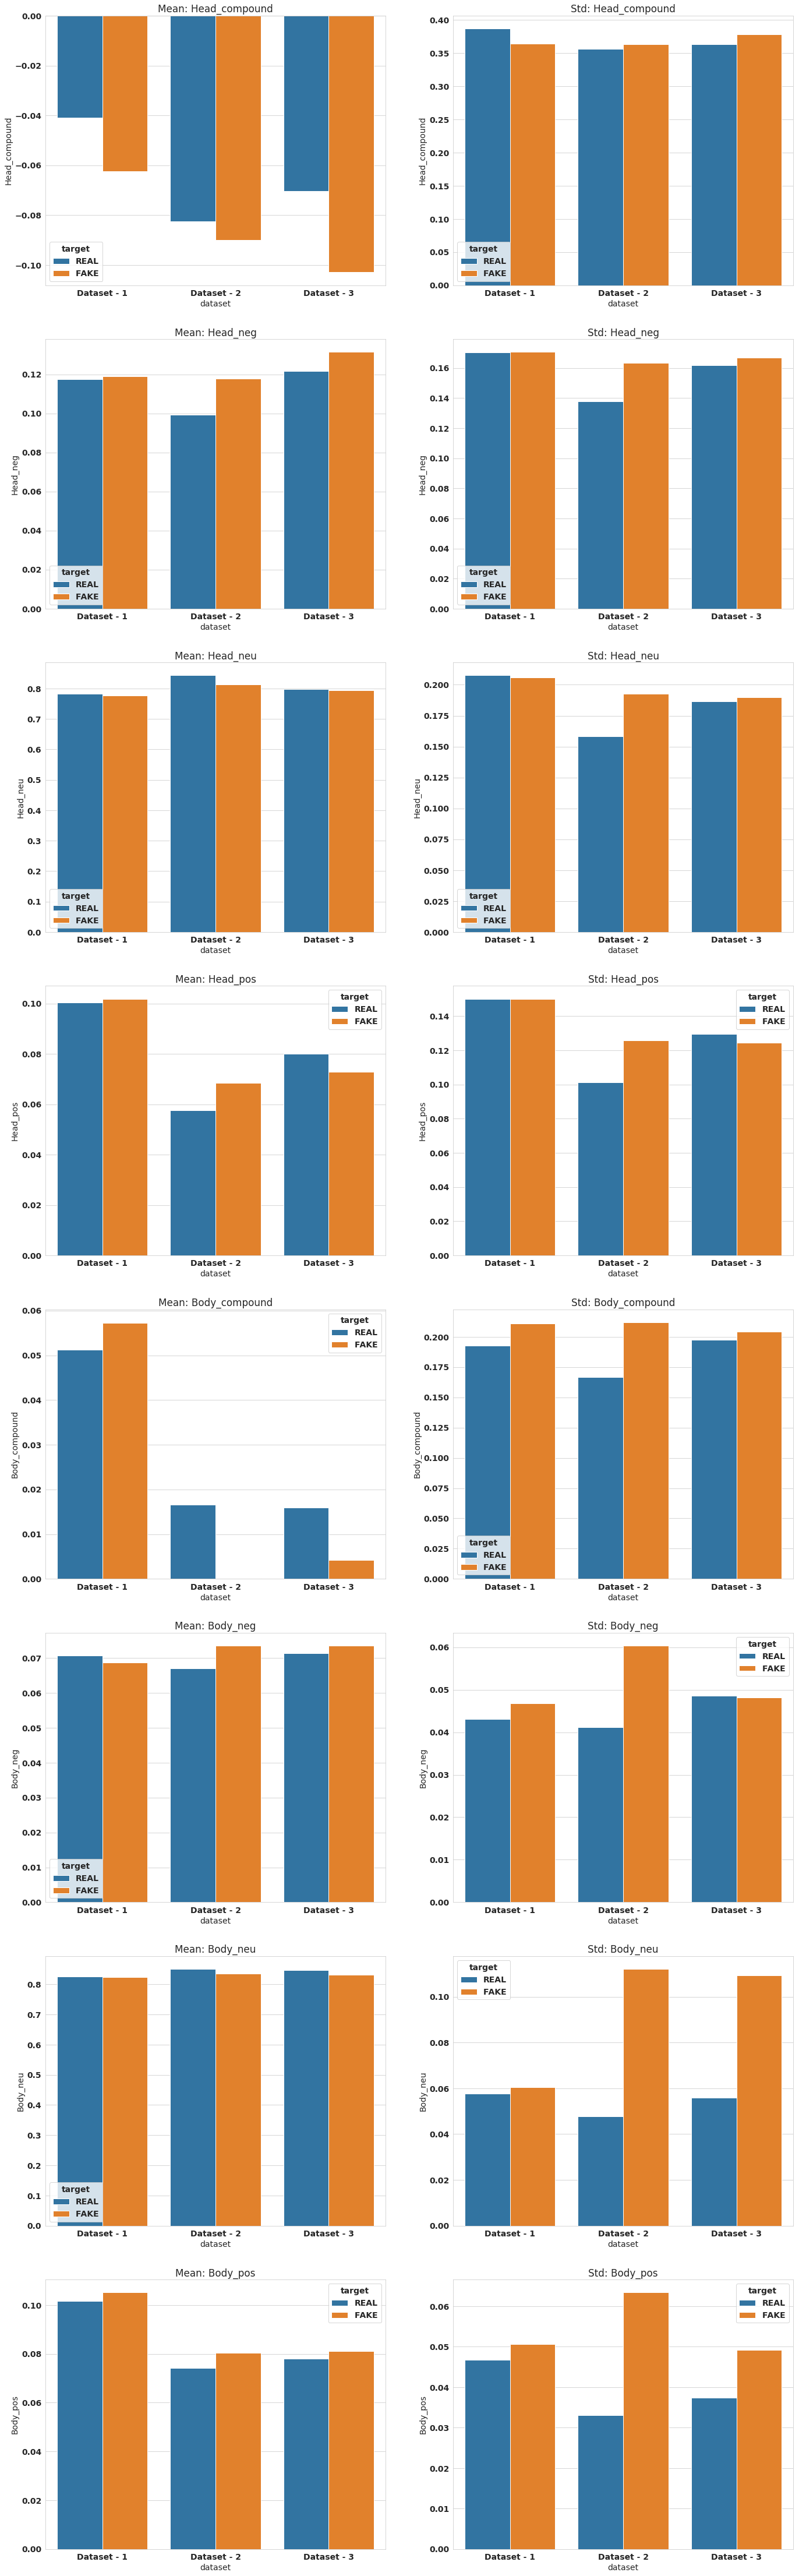

In [20]:
fig, axs = plt.subplots(nrows = len(sentiments), ncols = 2,figsize = (23,10*len(sentiments)))
for i,j in enumerate(sentiments):
    sns.barplot(x = 'dataset', y = j, hue = 'target', data=f_combined, ax=axs[i][0],
               estimator = np.mean, ci=False)
    axs[i][0].title.set_text('Mean: '+j)
    sns.barplot(x = 'dataset', y = j, hue = 'target', data=f_combined, ax=axs[i][1], 
                estimator= np.std, ci = False)
    axs[i][1].title.set_text('Std: '+j)

#fig.savefig(save_plot+'Categorical_sentiments_features', dpi = 300)

## Count Features

In [17]:
cf_columns = ['count_of_Headline_unigram', 'count_of_unique_Headline_unigram', 
              'ratio_of_unique_Headline_unigram', 'count_of_Headline_bigram', 
              'count_of_unique_Headline_bigram', 'ratio_of_unique_Headline_bigram', 
              'count_of_Headline_trigram', 'count_of_unique_Headline_trigram', 
              'ratio_of_unique_Headline_trigram', 'count_of_articleBody_unigram', 
              'count_of_unique_articleBody_unigram', 'ratio_of_unique_articleBody_unigram', 
              'count_of_articleBody_bigram', 'count_of_unique_articleBody_bigram', 
              'ratio_of_unique_articleBody_bigram', 'count_of_articleBody_trigram', 
              'count_of_unique_articleBody_trigram', 'ratio_of_unique_articleBody_trigram', 
              'count_of_Headline_unigram_in_articleBody', 
              'ratio_of_Headline_unigram_in_articleBody', 
              'count_of_Headline_bigram_in_articleBody', 
              'ratio_of_Headline_bigram_in_articleBody', 'count_of_Headline_trigram_in_articleBody', 
              'ratio_of_Headline_trigram_in_articleBody', 'len_sent_Headline', 
              'len_sent_articleBody', 'fake_exist', 'fraud_exist', 'hoax_exist', 
              'false_exist', 'deny_exist', 'denies_exist', 'not_exist', 'despite_exist', 
              'nope_exist', 'doubt_exist', 'doubts_exist', 'bogus_exist', 'debunk_exist', 
              'pranks_exist', 'retract_exist']

countss = [i for i in cf_columns if 'count' in i]

ratioss = [i for i in cf_columns if 'ratio' in i]

existss = [i for i in cf_columns if 'exist' in i]

lenss = [i for i in cf_columns if 'len' in i]

print(len(countss), len(ratioss), len(existss), len(lenss))
countss, ratioss, existss

cf_c = pd.read_csv('datasets/count_features_combined.csv')
cf_c.head()

15 9 15 2


,count_of_Headline_unigram,count_of_unique_Headline_unigram,ratio_of_unique_Headline_unigram,count_of_Headline_bigram,count_of_unique_Headline_bigram,ratio_of_unique_Headline_bigram,count_of_Headline_trigram,count_of_unique_Headline_trigram,ratio_of_unique_Headline_trigram,count_of_articleBody_unigram,...,despite_exist,nope_exist,doubt_exist,doubts_exist,bogus_exist,debunk_exist,pranks_exist,retract_exist,target,dataset
0,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REAL,Dataset - 1
1,9.0,9.0,1.0,8.0,8.0,1.0,7.0,7.0,1.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
3,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
4,4.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1


In [18]:
cf_c[lenss[0]].max()

7.0

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


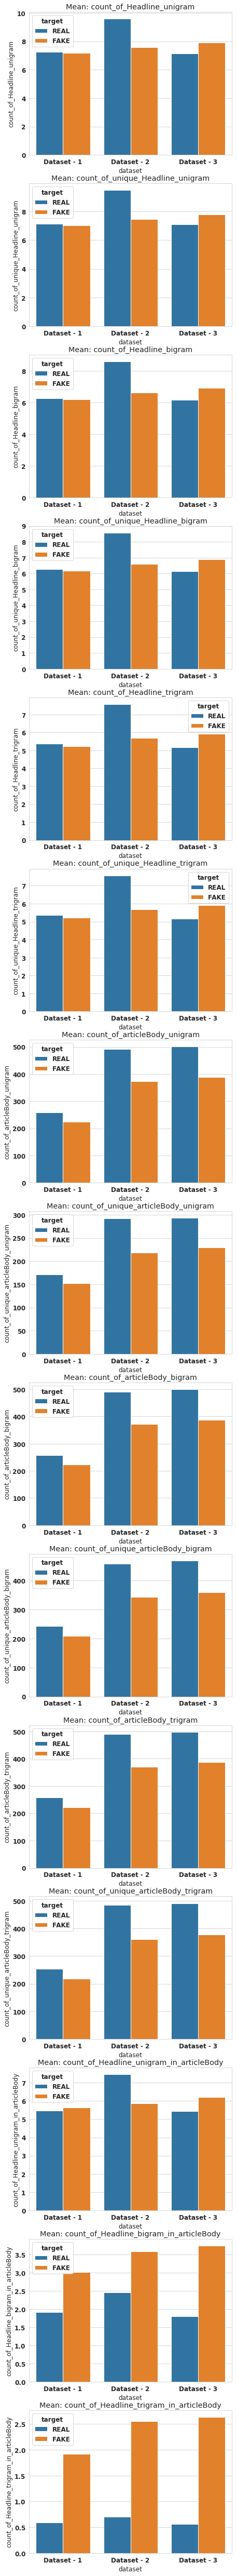

In [23]:
fig, axs = plt.subplots(nrows = len(countss), figsize = (7,6*len(countss)))
for i in range(len(countss)):
    sns.barplot(x = 'dataset', y = countss[i], data = cf_c, hue = 'target', ci = False, ax = axs[i])
    axs[i].title.set_text('Mean: '+countss[i])

In [ ]:
#fig.savefig(save_plot+'Categorical_reading_features', dpi = 300)

## Lexical Diversity

In [8]:
ld = pd.read_csv('Lexical_combined.csv', index_col = 0)
ld.columns = ['Lexical diversity', 'label', 'dataset']
ld.head()

,Lexical diversity,label,dataset
0,39.73,FAKE,Other
1,59.26,FAKE,Other
2,52.85,REAL,Other
3,58.95,FAKE,Other
4,53.43,REAL,Other


In [9]:
tdic = {'Other':'Dataset - 3', 'Kaggle': 'Dataset - 2', 'Opensources': 'Dataset - 1'}

In [10]:
ld['dataset'] = ld['dataset'].map(lambda x: tdic[x])

In [11]:

ld.head()

,Lexical diversity,label,dataset
0,39.73,FAKE,Dataset - 3
1,59.26,FAKE,Dataset - 3
2,52.85,REAL,Dataset - 3
3,58.95,FAKE,Dataset - 3
4,53.43,REAL,Dataset - 3


F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


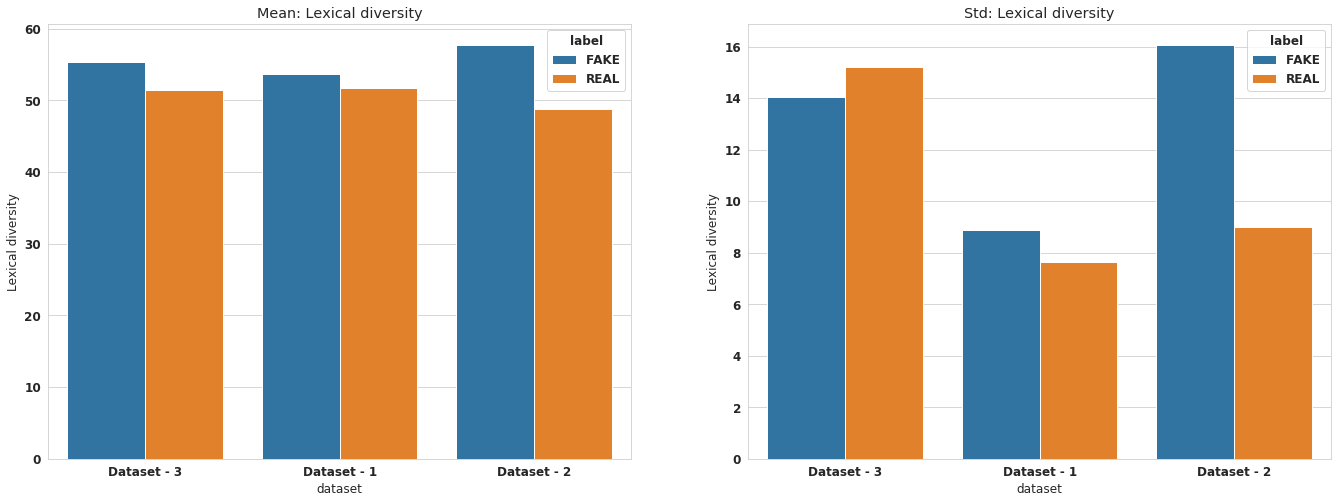

In [12]:
fig, axs = plt.subplots(ncols = 2, figsize=(23,8))
sns.barplot(x = 'dataset', y = 'Lexical diversity', hue = 'label', data = ld, ci = False,
           estimator = np.mean, ax = axs[0])
sns.barplot(x = 'dataset', y = 'Lexical diversity', hue = 'label', data = ld, ci = False,
           estimator = np.std, ax = axs[1])
axs[0].title.set_text('Mean: Lexical diversity')
axs[1].title.set_text('Std: Lexical diversity')

#fig.savefig(save_plot+'Lexical_diversity_datawise',dpi = 300)

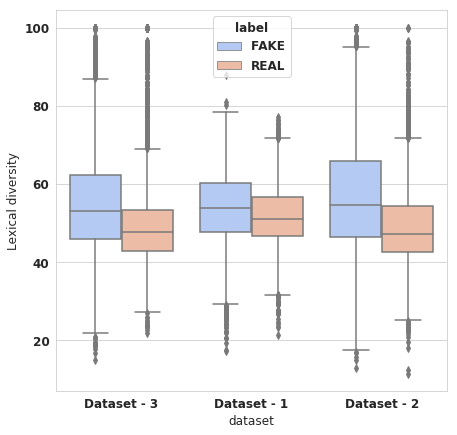

In [14]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
fig, axs = plt.subplots(figsize = (7,7))
x = sns.boxplot(x = 'dataset', y = 'Lexical diversity', hue = 'label', data = ld, palette='coolwarm',
           ax = axs)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig.savefig(save_plot+'lexical_box_plot', dpi = 300)

## Wordcloud


In [64]:
from wordcloud import WordCloud,ImageColorGenerator
from collections import Counter
from nltk.corpus import stopwords


In [65]:
stopwords = set(stopwords.words('English'))

In [20]:
k = pd.read_csv('datasets/Kaggle/train.csv')

In [21]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
Unnamed: 0    225 non-null int64
content       225 non-null object
type          225 non-null object
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


In [70]:
r = k[k['type'] == 'reliable']['content']
f = k[k['type'] == 'fake']['content']
all_r = [news for news in r]
all_f = [news for news in f]
all_r = '\n'.join(all_r)
all_f = '\n'.join(all_f)
len(all_r)

224395

In [71]:
all_r.split()[:3]

['Facebook/DestinyTheGame', 'Promo', 'image']

In [72]:
words_r = [word for word in all_r.split() if word not in stopwords]
words_f = [word for word in all_f.split() if word not in stopwords]

In [73]:
r = Counter(words_r)
f = Counter(words_f)

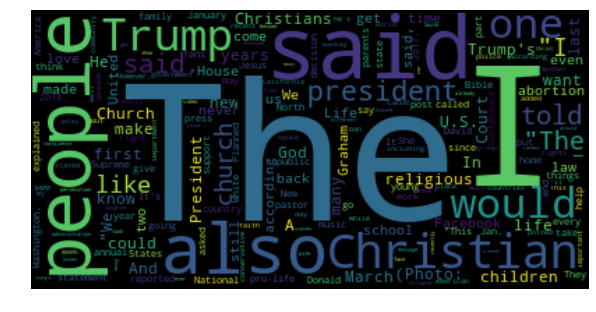

In [74]:
plt.figure(figsize=(10,7))
wordcloud = WordCloud().generate_from_frequencies(r)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

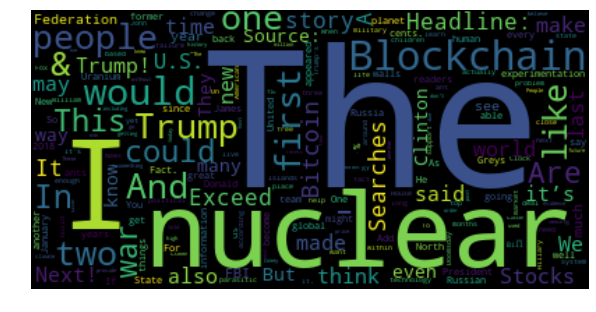

In [75]:
plt.figure(figsize=(10,7))
wordcloud = WordCloud().generate_from_frequencies(f)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()